<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [6]:
from sklearn.model_selection import train_test_split 
import numpy as np
def load_quickdraw10(path):

  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                      random_state=42)

  return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = load_quickdraw10('quickdraw10 (3).npz')

In [10]:
X_train.shape
y_train.shape

(70000,)

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [12]:
#imports 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

def create_model(lr=.01, optimizer=SGD):
  
  opt = optimizer(learning_rate=lr)

  model = Sequential(
      [
      Dense(32, activation='sigmoid', input_dim=784),
      Dense(32, activation='sigmoid'), 
      Dense(10, activation='softmax')
      ]
  )

  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [ ]:
batch_32 = create_model()

batch_default = batch_32.fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=32, 
                             validation_data=(X_test, y_test))

In [ ]:
batch_15 = create_model()

batch_15 = batch_15.fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=15, 
                             validation_data=(X_test, y_test))

In [ ]:
batch_8 = create_model().fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=8, 
                             validation_data=(X_test, y_test))

In [ ]:
batch_50 = create_model().fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=50, 
                             validation_data=(X_test, y_test))

In [ ]:
batch_75 = create_model().fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=75, 
                             validation_data=(X_test, y_test))

In [20]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([batch_default, batch_15, batch_8, batch_50, batch_75], ["32_", "15_", "8_", "50_", "75_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.940602,0.431614,1.617477,0.550900,0,32_
1,1.431349,0.601500,1.294585,0.632067,1,32_
2,1.195269,0.657814,1.117763,0.678100,2,32_
3,1.069725,0.685843,1.031387,0.700133,3,32_
4,1.004584,0.697257,0.989285,0.710900,4,32_


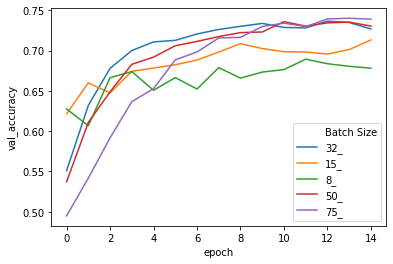

In [21]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)

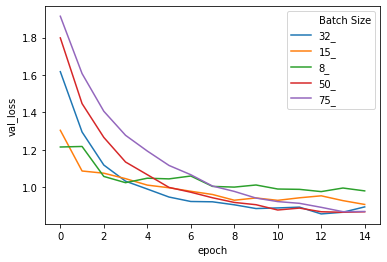

In [22]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df)

### Analysis for altering Batch Size
- This was a faily correlated change a we altered it in each experiment. The smaller batch size seemed to struggle to have the same accuracy as the higher batch sizes. Which is usually less of the case. I would be interested to see if an even smaller batch size would help to the move the accuracy back towards a higher number

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [ ]:
lr_1 = create_model(lr=1).fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=75, 
                             validation_data=(X_test, y_test))

In [ ]:
lr_onetenth = create_model(lr=.1).fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=75, 
                             validation_data=(X_test, y_test))

In [ ]:
lr_oneonehundreth = create_model(lr=.01).fit(X_train, y_train, 
                                             epochs=15, 
                                             batch_size=75, 
                                             validation_data=(X_test, y_test))

In [ ]:
lr_onethousandth = create_model(lr=.001).fit(X_train, y_train, 
                                             epochs=15, 
                                             batch_size=75, 
                                             validation_data=(X_test, y_test))

In [ ]:
lr_onetenthousandth = create_model(lr=.0001).fit(X_train, y_train, 
                                             epochs=15, 
                                             batch_size=75, 
                                             validation_data=(X_test, y_test))

In [47]:
import seaborn as sns
import pandas as pd

learning_rates = []

for exp, result in zip([lr_1, lr_onetenth, lr_oneonehundreth, lr_onethousandth, lr_onetenthousandth], ["1.0_", ".1_", ".01_", ".001_", ".0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  learning_rates.append(df)

df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,1.872564,0.293357,1.763058,0.349067,0,1.0_
1,1.722671,0.366900,1.578556,0.444267,1,1.0_
2,1.671453,0.390557,1.728188,0.369267,2,1.0_
3,1.655012,0.393357,1.656977,0.385400,3,1.0_
4,1.691794,0.369314,1.986431,0.227933,4,1.0_


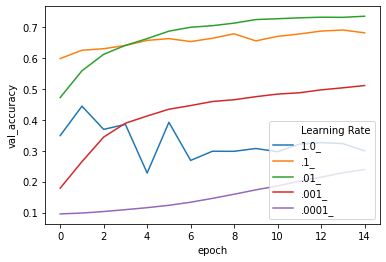

In [50]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);


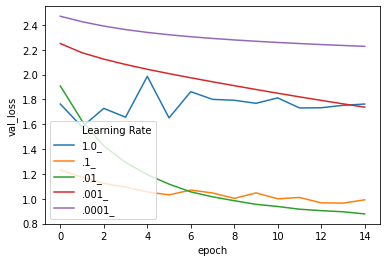

In [49]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df)

### Analysis of different Learning Rates
- I was assuming that as I lowered the learning rate the accurtacy would increase, that was not the case, it turns out that the learning rate had a weird relationship with the accuracy in some instances. Altering it did not slowly change in one direction opposed to another. There seems to be more of a "sweetspot" than anything else. That comes right aourn .01, which is the "rule of thumb" for learning rate. 

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [ ]:
sgd = create_model().fit(X_train, y_train, 
                        epochs=15, 
                        batch_size=75, 
                        validation_data=(X_test, y_test))

In [ ]:
adam = create_model(optimizer=Adam).fit(X_train, y_train, 
                                        epochs=15, 
                                        batch_size=75, 
                                        validation_data=(X_test, y_test))

In [ ]:
from tensorflow.keras.optimizers import Adadelta

adadelta = create_model(optimizer=Adadelta).fit(X_train, y_train, 
                                                epochs=15, 
                                                batch_size=75, 
                                                validation_data=(X_test, y_test))

In [ ]:
from tensorflow.keras.optimizers import Ftrl

ftrl = create_model(optimizer=Ftrl).fit(X_train, y_train, 
                                        epochs=15, 
                                        batch_size=75, 
                                        validation_data=(X_test, y_test))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

rmsprop = create_model(optimizer=RMSprop).fit(X_train, y_train, 
                                          epochs=15, 
                                          batch_size=75, 
                                          validation_data=(X_test, y_test))

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Backpropagation is the act of continuing to update the weights and bias of a Neutal network in order to get a better accuracy rating
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


